New red QSO Code

In [1]:
#Completeness checking step - list of objects with data for all 5 bands
import os

dataAddress = r"/home/elliesaga/Code/Work/YoRiS/data/Reds/images"

objects = list(os.listdir(dataAddress))

#list of complete objects
completeObjects = []

for object in objects:
    #we expect 10 files, 5 psfs and 5 images
    filesInObjectDirectory = len(list(os.listdir(f"{dataAddress}/{object}/")))
    if filesInObjectDirectory == 10:
        completeObjects.append(object)
    else:
        continue

print(f"{len(completeObjects)} objects out of {len(objects)} have data in all 5 bands")



146 objects out of 150 have data in all 5 bands


39633286363873846


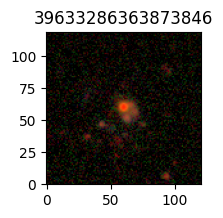

In [70]:
from astropy.visualization import make_lupton_rgb
import astropy.io.fits as pyfits
from matplotlib import pyplot as plt

#now, create colour images of each source and visually inspect for interfering foreground sources
index = 145
R = pyfits.open(f"{dataAddress}/{completeObjects[index]}/{completeObjects[index]}_HSC-I.fits")[1].data
G = pyfits.open(f"{dataAddress}/{completeObjects[index]}/{completeObjects[index]}_HSC-R.fits")[1].data
B = pyfits.open(f"{dataAddress}/{completeObjects[index]}/{completeObjects[index]}_HSC-G.fits")[1].data
image = make_lupton_rgb(R,G,B,stretch=0.5,Q=10)
print(f"{completeObjects[index]}")
fig,ax = plt.subplots(figsize=(2,2))
plt.title(f"{completeObjects[index]}")
ax.imshow(image,origin="lower")


In [87]:
#now saving images of all objects
import numpy as np
import matplotlib
#matplotlib.use('Agg')
imageAddress = r"/home/elliesaga/Code/Work/YoRiS/data/Reds/rgbimages"
contamCSV = r"/home/elliesaga/Code/Work/YoRiS/data/Reds/contaminationCheck.csv"
objects,contaminated = np.loadtxt(contamCSV,unpack=True,delimiter=",",skiprows=1,dtype=str)

for i, object in enumerate(objects):
    if contaminated[i] == " 1":
        continue
    else:
        #make image for each object
        R = pyfits.open(f"{dataAddress}/{object}/{object}_HSC-I.fits")[1].data
        G = pyfits.open(f"{dataAddress}/{object}/{object}_HSC-R.fits")[1].data
        B = pyfits.open(f"{dataAddress}/{object}/{object}_HSC-G.fits")[1].data
        image = make_lupton_rgb(R,G,B,stretch = 0.5,Q=10)
        plt.imshow(image)
        plt.savefig(f"{imageAddress}/{object}.png")
    
    